In [1]:
import neuron
from neuron import h,rxd,gui2
print(neuron.__version__)


from neuron import h,rxd, gui
from neuron.units import ms, mV
import textwrap

7.7.2


#Step 2: Create a cell 

##Aside 1: NEURON's h.topology function
NEURON's h.topology() function displays the topological structure of the entire model, indicating which sections are connected to which sections, where they are connected, and how many segments each section is divided into.


load library

In [2]:
import numpy as np
import matplotlib.pyplot as plt
image = np.load('data_from_19513019.npy')

(50000, 2)


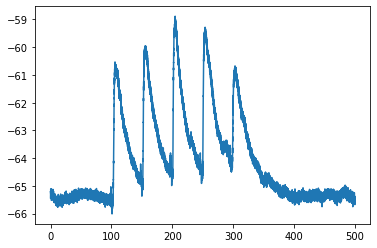

In [10]:
print(image.shape)
x = image[:,0] * 1000
y = image[:,1]
plt.plot(x,y)
plt.show()

# Our model

In [11]:
h.load_file('stdrun.hoc')


1.0

In [12]:
soma = h.Section(name='soma')
soma.L = 20
soma.diam = 20
soma.insert('hh')
dendrite = h.Section(name='dendrite')
dendrite.L = 500
dendrite.diam = 0.5
dendrite.nseg = 10
dendrite.insert('pas') #hh
dendrite_1 = h.Section(name='dendrite_1')
dendrite_1.L = 100
dendrite_1.diam = 0.5
dendrite_1.nseg = 10
dendrite_1.insert('pas')
dendrite_2 = h.Section(name='dendrite_2')
dendrite_2.L = 100
dendrite_2.diam = 0.5
dendrite_2.nseg = 10
dendrite_2.insert('pas');

Connection

In [13]:
dendrite.connect(soma,1,0)
dendrite_1.connect(dendrite,1,1)
dendrite_2.connect(dendrite,1,1);

In [14]:
h.topology()


|-|       soma(0-1)
   `---------|       dendrite(0-1)
              `---------|       dendrite_1(1-0)
              `---------|       dendrite_2(1-0)



1.0

Insert an alpha synaspe

Alpha synaspe 

In [15]:
h.load_file('stdrun.hoc')

s = h.NetStim()


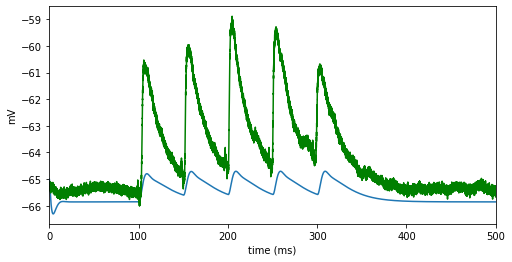

[-65.4296875  -65.23132324 -65.39916992 ... -65.61279297 -65.47546387
 -65.55175781]
[0.0000e+00 1.0000e-02 2.0000e-02 ... 4.9997e+02 4.9998e+02 4.9999e+02]


In [16]:
asyn = h.Exp2Syn(dendrite(0.5))
asyn.tau1 = 10
asyn.tau2 = 20
asyn.e = 0
asyn.i = 0
s.interval =50
s.number= 5
s.noise=0
s.start=0


stim = h.NetCon(s,asyn)
stim.delay=100

stim.weight[0] = 0.001


h.finitialize(-65 * mV)

v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.tstop = 500
h.run()
plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.plot(x,y,color='g')
plt.show()
print(y)
print(x)

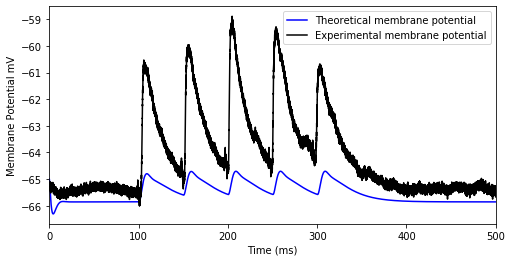

In [20]:
plt.figure(figsize=(8,4))
plt.plot(t_vec, v_vec,'b',label='Theoretical membrane potential')
plt.xlabel('Time (ms)')
plt.xlim(0,500)
plt.ylabel('Membrane Potential mV')
plt.plot(x,y,color='k',label='Experimental membrane potential')
plt.legend()

plt.savefig('fig1')
plt.show()

In [34]:
x1 = image[1000:,0]
y1 = image[1000:,1]
print(x1)
print(y1)

[0.01    0.01001 0.01002 ... 0.49997 0.49998 0.49999]
[-65.61279297 -65.68908691 -65.5670166  ... -65.61279297 -65.47546387
 -65.55175781]


In [35]:
1/0.00001

99999.99999999999

In [43]:
print(t_vec[1])

0.025


In [ ]:
v = h.Vector(2)
x = h.vector(y1)

print(v)

def efun(v):
    asyn.tau1 = 5
    asyn.tau2 = 10
    stim.weight[0] = 0.001
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

h.tstop = 500
h.run()
    return (v.x[0]+v.x[1] - 5)**2 + 5*(v.x[0]-v.x[1] - 15)**2(v[0] + v[1] ) ** 2 + (v[0] - v[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v[0], v[1]))

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:25: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


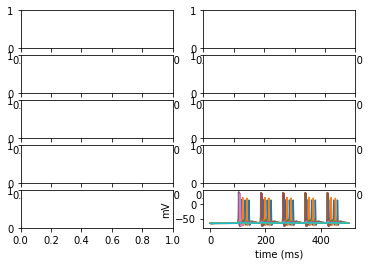

In [34]:
import numpy as np
c = np.linspace(0.1,1,10)

for a in c:
    for i in range(10):
        asyn = h.Exp2Syn(a,sec = dendrite)
        asyn.tau1 = 10
        asyn.tau2 = 10
        s.interval =80
        s.number=5
        s.noise=0
        s.start=100
        stim = h.NetCon(s,asyn)
        h.finitialize(-70 * mV)
        stim.weight[0] = 0.1
        v_vec = h.Vector()             # Membrane potential vector
        t_vec = h.Vector()             # Time stamp vector
        v_vec.record(soma(0.5)._ref_v)
        t_vec.record(h._ref_t)

        h.tstop = 500
        h.run()
        
       
        ax=plt.subplot(5, 2, i+1)
        ax.plot(t_vec,v_vec)
    
ax.set_xlabel('time (ms)')
ax.set_ylabel('mV')
plt.savefig('test.jpg')
plt.show()

In [29]:
v_vec = h.Vector()             # Membrane potential vector
t_vec = h.Vector()             # Time stamp vector
v_vec.record(soma(0.5)._ref_v)
t_vec.record(h._ref_t)

Vector[217]

In [30]:
h.tstop = 500
h.run()

0.0

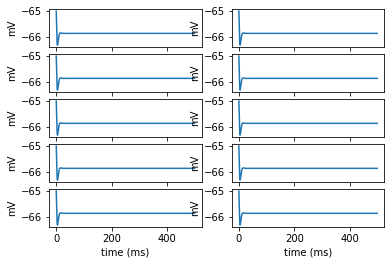

In [31]:
for i in range(0,len(c)):
    ax=plt.subplot(5, 2, i+1)
    ax.plot(t_vec,v_vec)
    ax.set_xlabel('time (ms)')
    ax.set_ylabel('mV')


plt.show()

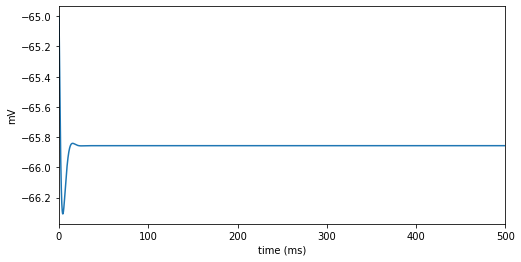

In [14]:

plt.figure(figsize=(8,4)) # Default figsize is (8,6)
plt.plot(t_vec, v_vec)
plt.xlabel('time (ms)')
plt.xlim(0,500)
plt.ylabel('mV')
plt.show()

In [15]:
x1 = image[1000:,0]
y1 = image[1000:,1]

In [30]:
v = h.Vector([0, 0])
def efun(v):
  return (2 + v[0] ) ** 2 + (3 - v[1]) ** 2  
h.attr_praxis(1e-5, 0.5, 0)
e = h.fit_praxis(efun, v)
print("e=%g x=%g y=%g\n"%(e, v[0], v[1]))


e=0 x=-2 y=3

